# __Data Wrangling__

## __Agenda__

- Introduction to Data Wrangling
- Data Collection
- Data Inspection
  * Accessing Rows Using .iloc and .loc
  * Checking for Missing Values
  * Handling Missing Data
- Dealing with Duplicates
- Data Cleaning
- Data Transformation
- Data Binning
- Handling Outliers
- Pandas Joining Techniques
    * Pandas Concatenate
    * Pandas Merge Dataframes
    * Pandas Join Dataframes
- Aggregating Data
- Reshaping Data

## __1. Introduction to Data Wrangling__
Data wrangling, also known as data munging or data preprocessing, is the process of cleaning, structuring, and transforming raw data into a format suitable for analysis.
- It is a crucial step in the data preparation pipeline, aiming to make the data more accessible, understandable, and ready for various analytical tasks.
- It involves dealing with missing values, handling outliers, transforming variables, and merging datasets, among other tasks.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Introduction.png)

## __2. Data Collection:__

Data collection is the process of gathering information from diverse sources to build a comprehensive dataset for analysis.
- Sources may include databases, APIs (application programming interfaces), spreadsheets, or external files. Effective data collection ensures the availability of relevant and reliable information.

### __Loading Data:__
Start by loading data into a Pandas DataFrame

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Loading.png)

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('HousePrices.csv')

## __3. Data Inspection__
It involves exploring the dataset to gain insights into its structure and quality.
- This step involves using functions like df.head(), df.info(), and df.describe() to gain insights into the dataset's structure, data types, and statistical summaries. Checking for missing values, outliers, and inconsistencies is crucial to identify potential issues that need addressing.

In [ ]:
# Inspecting the first few rows of the DataFrame
print(df.head())

# Displaying the last few rows of the DataFrame
print(df.tail())

               date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 00:00   313000.0         3       1.50         1340      7912   
1  02-05-2014 00:00  2384000.0         5       2.50         3650      9050   
2  02-05-2014 00:00   342000.0         3       2.00         1930     11947   
3  02-05-2014 00:00   420000.0         3       2.25         2000      8030   
4  02-05-2014 00:00   550000.0         4       2.50         1940     10500   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   
2     1.0           0     0          4        1930              0      1966   
3     1.0           0     0          4        1000           1000      1963   
4     1.0           0     0          4        1140            800      1976   

   yr_renovated                    street       city  st

In [ ]:
# Providing information about the DataFrame, including data types and non-null counts
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   int64  
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [ ]:
# Displaying descriptive statistics of the DataFrame, such as mean, std, min, max, and so on.
df.describe()

price     bedrooms    bathrooms   sqft_living      sqft_lot  \
count  4.600000e+03  4600.000000  4600.000000   4600.000000  4.600000e+03   
mean   5.519630e+05     3.400870     2.160815   2139.346957  1.485252e+04   
std    5.638347e+05     0.908848     0.783781    963.206916  3.588444e+04   
min    0.000000e+00     0.000000     0.000000    370.000000  6.380000e+02   
25%    3.228750e+05     3.000000     1.750000   1460.000000  5.000750e+03   
50%    4.609435e+05     3.000000     2.250000   1980.000000  7.683000e+03   
75%    6.549625e+05     4.000000     2.500000   2620.000000  1.100125e+04   
max    2.659000e+07     9.000000     8.000000  13540.000000  1.074218e+06   

            floors   waterfront         view    condition   sqft_above  \
count  4600.000000  4600.000000  4600.000000  4600.000000  4600.000000   
mean      1.512065     0.007174     0.240652     3.451739  1827.265435   
std       0.538288     0.084404     0.778405     0.677230   862.168977   
min       1.000000     0.000000     0.000000     1.000000   370.000000   
25%       1.000000     0.000000     0.000000     3.000000  1190.000000   
50%       1.500000     0.000000     0.000000     3.000000  1590.000000   
75%       2.000000     0.000000     0.000000     4.000000  2300.000000   
max       3.500000     1.000000     4.000000     5.000000  9410.000000   

       sqft_basement     yr_built  yr_renovated  
count    4600.000000  4600.000000   4600.000000  
mean      312.081522  1970.786304    808.608261  
std       464.137228    29.731848    979.414536  
min         0.000000  1900.000000      0.000000  
25%         0.000000  1951.000000      0.000000  
50%         0.000000  1976.000000      0.000000  
75%       610.000000  1997.000000   1999.000000  
max      4820.000000  2014.000000   2014.000000

In [ ]:
# Displaying datatypes of the columns
print(df.dtypes)

date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object


### __3.1 Accessing Rows Using .iloc and .loc__
Inspecting the dataset involves exploring its content.
- Using .iloc and .loc allows you to access specific rows based on integer-location or label-based indexing, respectively.

iloc: index based
- df.iloc[row_index, column_index]

loc: label based
- df.loc[row_label, column_label]

In [ ]:
df.head(11)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0   02-05-2014 00:00   313000.0         3       1.50         1340      7912   
1   02-05-2014 00:00  2384000.0         5       2.50         3650      9050   
2   02-05-2014 00:00   342000.0         3       2.00         1930     11947   
3   02-05-2014 00:00   420000.0         3       2.25         2000      8030   
4   02-05-2014 00:00   550000.0         4       2.50         1940     10500   
5   02-05-2014 00:00   490000.0         2       1.00          880      6380   
6   02-05-2014 00:00   335000.0         2       2.00         1350      2560   
7   02-05-2014 00:00   482000.0         4       2.50         2710     35868   
8   02-05-2014 00:00   452500.0         3       2.50         2430     88426   
9   02-05-2014 00:00   640000.0         4       2.00         1520      6200   
10  02-05-2014 00:00   463000.0         3       1.75         1710      7320   

    floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0      1.5           0     0          3        1340              0      1955   
1      2.0           0     4          5        3370            280      1921   
2      1.0           0     0          4        1930              0      1966   
3      1.0           0     0          4        1000           1000      1963   
4      1.0           0     0          4        1140            800      1976   
5      1.0           0     0          3         880              0      1938   
6      1.0           0     0          3        1350              0      1976   
7      2.0           0     0          3        2710              0      1989   
8      1.0           0     0          4        1570            860      1985   
9      1.5           0     0          3        1520              0      1945   
10     1.0           0     0          3        1710              0      1948   

    yr_renovated                    street              city  statezip country  
0           2005      18810 Densmore Ave N         Shoreline  WA 98133     USA  
1              0           709 W Blaine St           Seattle  WA 98119     USA  
2              0  26206-26214 143rd Ave SE              Kent  WA 98042     USA  
3              0           857 170th Pl NE          Bellevue  WA 98008     USA  
4           1992         9105 170th Ave NE           Redmond  WA 98052     USA  
5           1994            522 NE 88th St           Seattle  WA 98115     USA  
6              0         2616 174th Ave NE           Redmond  WA 98052     USA  
7              0         23762 SE 253rd Pl      Maple Valley  WA 98038     USA  
8              0   46611-46625 SE 129th St        North Bend  WA 98045     USA  
9           2010          6811 55th Ave NE           Seattle  WA 98115     USA  
10          1994        Burke-Gilman Trail  Lake Forest Park  WA 98155     USA

In [ ]:
# Access the first row using iloc
result_iloc_0 = df.iloc[0]

# Display the result for df.iloc[0]
print("Result for df.iloc[0]:")
print(result_iloc_0)

# Access the eleventh row using iloc
result_iloc_10 = df.iloc[10]

# Display the result for df.iloc[10]
print("Result for df.iloc[10]:")
print(result_iloc_10)

Result for df.iloc[0]:
date                 02-05-2014 00:00
price                        313000.0
bedrooms                            3
bathrooms                         1.5
sqft_living                      1340
sqft_lot                         7912
floors                            1.5
waterfront                          0
view                                0
condition                           3
sqft_above                       1340
sqft_basement                       0
yr_built                         1955
yr_renovated                     2005
street           18810 Densmore Ave N
city                        Shoreline
statezip                     WA 98133
country                           USA
Name: 0, dtype: object
Result for df.iloc[10]:
date               02-05-2014 00:00
price                      463000.0
bedrooms                          3
bathrooms                      1.75
sqft_living                    1710
sqft_lot                       7320
floors                        

In [ ]:
# Access the eleventh row using iloc
result_loc_10 = df.loc[10]

# Display the result for df.iloc[10]
print("Result for df.loc[10]:")
print(result_loc_10)

Result for df.loc[10]:
date               02-05-2014 00:00
price                      463000.0
bedrooms                          3
bathrooms                      1.75
sqft_living                    1710
sqft_lot                       7320
floors                          1.0
waterfront                        0
view                              0
condition                         3
sqft_above                     1710
sqft_basement                     0
yr_built                       1948
yr_renovated                   1994
street           Burke-Gilman Trail
city               Lake Forest Park
statezip                   WA 98155
country                         USA
Name: 10, dtype: object


In [ ]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head(5)

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [ ]:
df_titanic = df_titanic.set_index('PassengerId')

In [ ]:
df_titanic.head(5)

Survived  Pclass                                          Name  \
PassengerId                                                                   
892                 0       3                              Kelly, Mr. James   
893                 1       3              Wilkes, Mrs. James (Ellen Needs)   
894                 0       2                     Myles, Mr. Thomas Francis   
895                 0       3                              Wirz, Mr. Albert   
896                 1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

                Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                               
892            male  34.5      0      0   330911   7.8292   NaN        Q  
893          female  47.0      1      0   363272   7.0000   NaN        S  
894            male  62.0      0      0   240276   9.6875   NaN        Q  
895            male  27.0      0      0   315154   8.6625   NaN        S  
896          female  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
df_titanic = pd.read_csv('titanic.csv')
df_titanic.head(5)

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [ ]:
df_titanic.set_index('PassengerId', inplace=True) # the same as df_titanic = df_titanic.set_index('PassengerId')

df_titanic.head(5)

Survived  Pclass                                          Name  \
PassengerId                                                                   
892                 0       3                              Kelly, Mr. James   
893                 1       3              Wilkes, Mrs. James (Ellen Needs)   
894                 0       2                     Myles, Mr. Thomas Francis   
895                 0       3                              Wirz, Mr. Albert   
896                 1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

                Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                               
892            male  34.5      0      0   330911   7.8292   NaN        Q  
893          female  47.0      1      0   363272   7.0000   NaN        S  
894            male  62.0      0      0   240276   9.6875   NaN        Q  
895            male  27.0      0      0   315154   8.6625   NaN        S  
896          female  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
df_titanic.head(5)

Survived  Pclass                                          Name  \
PassengerId                                                                   
892                 0       3                              Kelly, Mr. James   
893                 1       3              Wilkes, Mrs. James (Ellen Needs)   
894                 0       2                     Myles, Mr. Thomas Francis   
895                 0       3                              Wirz, Mr. Albert   
896                 1       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)   

                Sex   Age  SibSp  Parch   Ticket     Fare Cabin Embarked  
PassengerId                                                               
892            male  34.5      0      0   330911   7.8292   NaN        Q  
893          female  47.0      1      0   363272   7.0000   NaN        S  
894            male  62.0      0      0   240276   9.6875   NaN        Q  
895            male  27.0      0      0   315154   8.6625   NaN        S  
896          female  22.0      1      1  3101298  12.2875   NaN        S

In [ ]:
df_titanic.reset_index(inplace=True)
df_titanic.head(5)

PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S

In [ ]:
df_titanic.set_index(['PassengerId', 'Embarked'], inplace=True)
df_titanic.head(5)

Survived  Pclass  \
PassengerId Embarked                     
892         Q                0       3   
893         S                1       3   
894         Q                0       2   
895         S                0       3   
896         S                1       3   

                                                              Name     Sex  \
PassengerId Embarked                                                         
892         Q                                     Kelly, Mr. James    male   
893         S                     Wilkes, Mrs. James (Ellen Needs)  female   
894         Q                            Myles, Mr. Thomas Francis    male   
895         S                                     Wirz, Mr. Albert    male   
896         S         Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

                       Age  SibSp  Parch   Ticket     Fare Cabin  
PassengerId Embarked                                              
892         Q         34.5      0      0   330911   7.8292   NaN  
893         S         47.0      1      0   363272   7.0000   NaN  
894         Q         62.0      0      0   240276   9.6875   NaN  
895         S         27.0      0      0   315154   8.6625   NaN  
896         S         22.0      1      1  3101298  12.2875   NaN

In [ ]:
df_titanic.index

MultiIndex([( 892, 'Q'),
            ( 893, 'S'),
            ( 894, 'Q'),
            ( 895, 'S'),
            ( 896, 'S'),
            ( 897, 'S'),
            ( 898, 'Q'),
            ( 899, 'S'),
            ( 900, 'C'),
            ( 901, 'S'),
            ...
            (1300, 'Q'),
            (1301, 'S'),
            (1302, 'Q'),
            (1303, 'Q'),
            (1304, 'S'),
            (1305, 'S'),
            (1306, 'C'),
            (1307, 'S'),
            (1308, 'S'),
            (1309, 'C')],
           names=['PassengerId', 'Embarked'], length=418)

In [ ]:
df_titanic.reset_index(inplace=True)
df_titanic.head(5)

PassengerId Embarked  Survived  Pclass  \
0          892        Q         0       3   
1          893        S         1       3   
2          894        Q         0       2   
3          895        S         0       3   
4          896        S         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin  
0   330911   7.8292   NaN  
1   363272   7.0000   NaN  
2   240276   9.6875   NaN  
3   315154   8.6625   NaN  
4  3101298  12.2875   NaN

In [ ]:
df_titanic.set_index(['PassengerId'], inplace=True)
df_titanic.head(5)

Embarked  Survived  Pclass  \
PassengerId                              
892                Q         0       3   
893                S         1       3   
894                Q         0       2   
895                S         0       3   
896                S         1       3   

                                                     Name     Sex   Age  \
PassengerId                                                               
892                                      Kelly, Mr. James    male  34.5   
893                      Wilkes, Mrs. James (Ellen Needs)  female  47.0   
894                             Myles, Mr. Thomas Francis    male  62.0   
895                                      Wirz, Mr. Albert    male  27.0   
896          Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0   

             SibSp  Parch   Ticket     Fare Cabin  
PassengerId                                        
892              0      0   330911   7.8292   NaN  
893              1      0   363272   7.0000   NaN  
894              0      0   240276   9.6875   NaN  
895              0      0   315154   8.6625   NaN  
896              1      1  3101298  12.2875   NaN

In [ ]:
df_titanic.iloc[0]

Embarked                   Q
Survived                   0
Pclass                     3
Name        Kelly, Mr. James
Sex                     male
Age                     34.5
SibSp                      0
Parch                      0
Ticket                330911
Fare                  7.8292
Cabin                    NaN
Name: 892, dtype: object

In [ ]:
df_titanic.iloc[0:2] # get first 2 rows

Embarked  Survived  Pclass                              Name  \
PassengerId                                                                
892                Q         0       3                  Kelly, Mr. James   
893                S         1       3  Wilkes, Mrs. James (Ellen Needs)   

                Sex   Age  SibSp  Parch  Ticket    Fare Cabin  
PassengerId                                                    
892            male  34.5      0      0  330911  7.8292   NaN  
893          female  47.0      1      0  363272  7.0000   NaN

In [ ]:
df_titanic.iloc[0:2, 1:5] # get first 2 rows

Survived  Pclass                              Name     Sex
PassengerId                                                            
892                 0       3                  Kelly, Mr. James    male
893                 1       3  Wilkes, Mrs. James (Ellen Needs)  female

In [ ]:
df_titanic.loc[892]

Embarked                   Q
Survived                   0
Pclass                     3
Name        Kelly, Mr. James
Sex                     male
Age                     34.5
SibSp                      0
Parch                      0
Ticket                330911
Fare                  7.8292
Cabin                    NaN
Name: 892, dtype: object

In [ ]:
# get an error
# df_titanic.loc[0]

In [ ]:
# get first 2 rows
df_titanic.loc[892:893]

Embarked  Survived  Pclass                              Name  \
PassengerId                                                                
892                Q         0       3                  Kelly, Mr. James   
893                S         1       3  Wilkes, Mrs. James (Ellen Needs)   

                Sex   Age  SibSp  Parch  Ticket    Fare Cabin  
PassengerId                                                    
892            male  34.5      0      0  330911  7.8292   NaN  
893          female  47.0      1      0  363272  7.0000   NaN

In [ ]:
df_titanic.loc[892:893, 'Pclass':'Age']

Pclass                              Name     Sex   Age
PassengerId                                                        
892               3                  Kelly, Mr. James    male  34.5
893               3  Wilkes, Mrs. James (Ellen Needs)  female  47.0

In [ ]:
# convert passID to string and use loc

### __3.2 Checking for Missing Values__
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Checking_for_missing_values.png)

In [ ]:
# Checking for missing values
missing_values = df.isnull().sum()
print("Missing Values per Column:")
print(missing_values)

Missing Values per Column:
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64


### __3.3 Handling Missing Data__
Handling missing data is crucial for maintaining data integrity. Various approaches include imputation (replacing missing values with estimated values), the removal of records with missing values, or using default values when appropriate.
![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Handling_missing_data.png)

To handle missing values in numerical columns of the dataset, we utilize `iloc` to select them, excluding text columns. Thus, we focus solely on columns 1 to 14, which do not contain text data.

In [ ]:
df.iloc[0, 1:14]

price            313000.0
bedrooms                3
bathrooms             1.5
sqft_living          1340
sqft_lot             7912
floors                1.5
waterfront              0
view                    0
condition               3
sqft_above           1340
sqft_basement           0
yr_built             1955
yr_renovated         2005
Name: 0, dtype: object

In [ ]:
# Handling missing values using imputation
df_filled = df.fillna(df.iloc[:, 1:14].mean())

In [ ]:
print(df_titanic.isnull().sum())

Embarked      0
Survived      0
Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          1
Cabin       327
dtype: int64


In [ ]:
df_titanic.dtypes

Embarked     object
Survived      int64
Pclass        int64
Name         object
Sex          object
Age         float64
SibSp         int64
Parch         int64
Ticket       object
Fare        float64
Cabin        object
dtype: object

In [ ]:
df_titanic.mean(numeric_only=True)

Survived     0.363636
Pclass       2.265550
Age         30.272590
SibSp        0.447368
Parch        0.392344
Fare        35.627188
dtype: float64

In [ ]:
# fill missing values with the mean value (numerical columns)
df_titanic.fillna(df_titanic.mean(numeric_only=True), inplace=True)

In [ ]:
print(df_titanic.isnull().sum())

Embarked      0
Survived      0
Pclass        0
Name          0
Sex           0
Age           0
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       327
dtype: int64


In [ ]:
df_titanic.mode()

Embarked  Survived  Pclass                                           Name  \
0          S       0.0     3.0                  Abbott, Master. Eugene Joseph   
1        NaN       NaN     NaN                    Abelseth, Miss. Karen Marie   
2        NaN       NaN     NaN                  Abelseth, Mr. Olaus Jorgensen   
3        NaN       NaN     NaN       Abrahamsson, Mr. Abraham August Johannes   
4        NaN       NaN     NaN      Abrahim, Mrs. Joseph (Sophie Halaut Easu)   
..       ...       ...     ...                                            ...   
413      NaN       NaN     NaN                     de Brito, Mr. Jose Joaquim   
414      NaN       NaN     NaN           de Messemaeker, Mr. Guillaume Joseph   
415      NaN       NaN     NaN  del Carlo, Mrs. Sebastiano (Argenia Genovesi)   
416      NaN       NaN     NaN            van Billiard, Master. James William   
417      NaN       NaN     NaN              van Billiard, Master. Walter John   

      Sex       Age  SibSp  Parch    Ticket  Fare            Cabin  
0    male  30.27259    0.0    0.0  PC 17608  7.75  B57 B59 B63 B66  
1     NaN       NaN    NaN    NaN       NaN   NaN              NaN  
2     NaN       NaN    NaN    NaN       NaN   NaN              NaN  
3     NaN       NaN    NaN    NaN       NaN   NaN              NaN  
4     NaN       NaN    NaN    NaN       NaN   NaN              NaN  
..    ...       ...    ...    ...       ...   ...              ...  
413   NaN       NaN    NaN    NaN       NaN   NaN              NaN  
414   NaN       NaN    NaN    NaN       NaN   NaN              NaN  
415   NaN       NaN    NaN    NaN       NaN   NaN              NaN  
416   NaN       NaN    NaN    NaN       NaN   NaN              NaN  
417   NaN       NaN    NaN    NaN       NaN   NaN              NaN  

[418 rows x 11 columns]

In [ ]:
# fill missing values with the mode value (categorical columns)
df_titanic.fillna(df_titanic['Cabin'].mode()[0], inplace=True)

In [ ]:
df_titanic.head()

Embarked  Survived  Pclass  \
PassengerId                              
892                Q         0       3   
893                S         1       3   
894                Q         0       2   
895                S         0       3   
896                S         1       3   

                                                     Name     Sex   Age  \
PassengerId                                                               
892                                      Kelly, Mr. James    male  34.5   
893                      Wilkes, Mrs. James (Ellen Needs)  female  47.0   
894                             Myles, Mr. Thomas Francis    male  62.0   
895                                      Wirz, Mr. Albert    male  27.0   
896          Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0   

             SibSp  Parch   Ticket     Fare            Cabin  
PassengerId                                                   
892              0      0   330911   7.8292  B57 B59 B63 B66  
893              1      0   363272   7.0000  B57 B59 B63 B66  
894              0      0   240276   9.6875  B57 B59 B63 B66  
895              0      0   315154   8.6625  B57 B59 B63 B66  
896              1      1  3101298  12.2875  B57 B59 B63 B66

In [ ]:
print(df_titanic.isnull().sum())

Embarked    0
Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Cabin       0
dtype: int64


## __4. Dealing with Duplicates__

Duplicates in a dataset can introduce bias and errors.
- Identifying and handling duplicate records is essential for ensuring accurate analysis and reporting.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Dealing_with_duplicates.png)

In [ ]:
# Removing duplicate records
df_no_duplicates = df.drop_duplicates()

By default, `drop_duplicates()` retains the first occurrence of a duplicate and removes subsequent ones. This behavior can be changed using the `keep` parameter, if specified otherwise.

<!-- df = pd.DataFrame({
...     'brand': ['Yum Yum', 'Yum Yum', 'Indomie', 'Indomie', 'Indomie'],
...     'style': ['cup', 'cup', 'cup', 'pack', 'pack'],
...     'rating': [4, 4, 3.5, 15, 5]
... }) -->


## __5. Data Cleaning__

This includes correcting typographical errors, standardizing date formats, and resolving inconsistencies in categorical data labeling.
- Standardizing data formats and units ensures consistency and facilitates analysis.

In [ ]:
df.head(2)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  02-05-2014 00:00   313000.0         3        1.5         1340      7912   
1  02-05-2014 00:00  2384000.0         5        2.5         3650      9050   

   floors  waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0     1.5           0     0          3        1340              0      1955   
1     2.0           0     4          5        3370            280      1921   

   yr_renovated                street       city  statezip country  
0          2005  18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0       709 W Blaine St    Seattle  WA 98119     USA

In [ ]:
df.date.iloc[-50:-45]

4550    26-06-2014 00:00
4551    26-06-2014 00:00
4552    26-06-2014 00:00
4553    27-06-2014 00:00
4554    27-06-2014 00:00
Name: date, dtype: object

In [ ]:
# Cleaning data by standardizing formats

# df['date'] = pd.to_datetime(df['date'])
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y %H:%M')
# Displaying the DataFrame after cleaning
print("DataFrame after cleaning data by standardizing formats:")
df.head(2)

DataFrame after cleaning data by standardizing formats:


date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0         3        1.5         1340      7912     1.5   
1 2014-05-02  2384000.0         5        2.5         3650      9050     2.0   

   waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
0           0     0          3        1340              0      1955   
1           0     4          5        3370            280      1921   

   yr_renovated                street       city  statezip country  
0          2005  18810 Densmore Ave N  Shoreline  WA 98133     USA  
1             0       709 W Blaine St    Seattle  WA 98119     USA

In [ ]:
print(df.dtypes)

date             datetime64[ns]
price                   float64
bedrooms                  int64
bathrooms               float64
sqft_living               int64
sqft_lot                  int64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
street                   object
city                     object
statezip                 object
country                  object
dtype: object


## __6. Data Transformation__

Data transformation includes converting data types, creating new features through feature engineering, and normalizing or scaling numeric values as needed.

In [ ]:
# Creating a new feature and normalizing numeric values
# Check if 'price' column exists in the DataFrame
import numpy as np
if 'price' in df.columns:

    '''apply() function applies a function to each element in a column.
    Take each value x from price column, and apply np.log()'''

    # Use the natural logarithm to create a new feature 'Log_Price'
    df['Log_Price'] = df['price'].apply(lambda x: np.log(x))

    # Normalize 'price' column and create a new feature 'Normalized_Price'
    df['Normalized_Price'] = (df['price'] - df['price'].min()) / (df['price'].max() - df['price'].min())
    '''Normalization transforms the values of a column to a range between 0 and 1.
    Alternative is to use MinMaxScaler() from sklearn'''

    # Displaying the DataFrame with the new features
    print("DataFrame with new features:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with new features:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05         3       1.50         1340      7912   
1    2014-05-02  2.384000e+06         5       2.50         3650      9050   
2    2014-05-02  3.420000e+05         3       2.00         1930     11947   
3    2014-05-02  4.200000e+05         3       2.25         2000      8030   
4    2014-05-02  5.500000e+05         4       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05         3       1.75         1510      6360   
4596 2014-07-09  5.343333e+05         3       2.50         1460      7573   
4597 2014-07-09  4.169042e+05         3       2.50         3010      7014   
4598 2014-07-10  2.034000e+05         4       2.00         2090      6630   
4599 2014-07-10  2.206000e+05         3       2.50         1490      8102   

      floors  waterfront  view  condition  sqf

<ipython-input-71-4efb5edf05ba>:10: RuntimeWarning: divide by zero encountered in log
  df['Log_Price'] = df['price'].apply(lambda x: np.log(x))


In [ ]:
# log_price is -inf
df[df.Log_Price < 0]

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4354 2014-05-05    0.0         3       1.75         1490     10125     1.0   
4356 2014-05-05    0.0         4       2.75         2600      5390     1.0   
4357 2014-05-05    0.0         6       2.75         3200      9200     1.0   
4358 2014-05-06    0.0         5       3.50         3480     36615     2.0   
4361 2014-05-07    0.0         5       1.50         1500      7112     1.0   
4362 2014-05-07    0.0         4       4.00         3680     18804     2.0   
4374 2014-05-09    0.0         2       2.50         2200    188200     1.0   
4376 2014-05-09    0.0         4       2.25         2170     10500     1.0   
4382 2014-05-12    0.0         5       4.50         4630      6324     2.0   
4383 2014-05-13    0.0         5       4.00         4430      9000     2.0   
4385 2014-05-13    0.0         4       4.50         5030     11023     2.0   
4386 2014-05-13    0.0         4       1.50         2180     22870     1.0   
4389 2014-05-15    0.0         4       3.50         4210     10308     2.0   
4394 2014-05-16    0.0         5       3.25         3690     12353     2.0   
4405 2014-05-20    0.0         4       3.75         3300      4545     1.5   
4408 2014-05-21    0.0         5       2.25         2880     11965     2.0   
4411 2014-05-22    0.0         5       2.25         2000      7900     1.0   
4412 2014-05-22    0.0         3       3.00         1860      7440     1.0   
4413 2014-05-22    0.0         4       3.00         1990      6180     2.0   
4420 2014-05-27    0.0         4       1.00         1360     13372     1.0   
4442 2014-06-02    0.0         1       1.00          720      6000     1.0   
4448 2014-06-03    0.0         5       2.75         2740      5616     1.5   
4453 2014-06-03    0.0         3       1.00         1300      6710     1.0   
4454 2014-06-03    0.0         5       2.50         2090      4698     2.0   
4472 2014-06-09    0.0         4       3.75         4060     19290     2.0   
4478 2014-06-11    0.0         5       2.75         2910     53898     1.0   
4479 2014-06-11    0.0         5       2.00         1910      7200     1.0   
4480 2014-06-11    0.0         3       2.50         2880     13500     1.0   
4481 2014-06-11    0.0         5       2.75         3240      6863     2.0   
4487 2014-06-12    0.0         4       1.00         2080      3500     1.5   
4499 2014-06-17    0.0         5       3.75         3870      8225     2.0   
4507 2014-06-18    0.0         4       1.50         2310     68824     2.0   
4509 2014-06-18    0.0         6       3.00         3020     13783     2.0   
4520 2014-06-20    0.0         4       2.50         1960     11600     1.0   
4521 2014-06-20    0.0         4       1.00         1810      7500     1.0   
4522 2014-06-22    0.0         2       2.25         1490      6770     1.5   
4523 2014-06-23    0.0         3       4.50         5230     17826     2.0   
4528 2014-06-24    0.0         4       5.00         4550     18641     1.0   
4534 2014-06-24    0.0         3       2.75         1310      7300     1.0   
4542 2014-06-25    0.0         5       3.50         2640      6895     2.0   
4552 2014-06-26    0.0         4       2.00         2100      4857     2.0   
4554 2014-06-27    0.0         2       1.00          810      8424     1.0   
4555 2014-06-27    0.0         2       1.50         1520      8040     1.0   
4558 2014-06-28    0.0         4       4.25         3500      8750     1.0   
4563 2014-07-01    0.0         2       2.25         2130      4920     1.5   
4567 2014-07-02    0.0         4       2.50         4080     18362     2.0   
4574 2014-07-02    0.0         3       1.00         1520      9030     1.0   
4575 2014-07-02    0.0         5       6.25         8020     21738     2.0   
4588 2014-07-08    0.0         4       2.25         2890     18226     3.0   

      waterfront  view  condition  sqft_above  sqft_basement  yr_built  \
4354           0     0          4   

In [ ]:
df['Log_Price_Fixed'] = df['price'].apply(lambda x: np.log(x) if x > 0 else 0)

In [ ]:
df[df.Log_Price_Fixed == 0]

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4354 2014-05-05    0.0         3       1.75         1490     10125     1.0   
4356 2014-05-05    0.0         4       2.75         2600      5390     1.0   
4357 2014-05-05    0.0         6       2.75         3200      9200     1.0   
4358 2014-05-06    0.0         5       3.50         3480     36615     2.0   
4361 2014-05-07    0.0         5       1.50         1500      7112     1.0   
4362 2014-05-07    0.0         4       4.00         3680     18804     2.0   
4374 2014-05-09    0.0         2       2.50         2200    188200     1.0   
4376 2014-05-09    0.0         4       2.25         2170     10500     1.0   
4382 2014-05-12    0.0         5       4.50         4630      6324     2.0   
4383 2014-05-13    0.0         5       4.00         4430      9000     2.0   
4385 2014-05-13    0.0         4       4.50         5030     11023     2.0   
4386 2014-05-13    0.0         4       1.50         2180     22870     1.0   
4389 2014-05-15    0.0         4       3.50         4210     10308     2.0   
4394 2014-05-16    0.0         5       3.25         3690     12353     2.0   
4405 2014-05-20    0.0         4       3.75         3300      4545     1.5   
4408 2014-05-21    0.0         5       2.25         2880     11965     2.0   
4411 2014-05-22    0.0         5       2.25         2000      7900     1.0   
4412 2014-05-22    0.0         3       3.00         1860      7440     1.0   
4413 2014-05-22    0.0         4       3.00         1990      6180     2.0   
4420 2014-05-27    0.0         4       1.00         1360     13372     1.0   
4442 2014-06-02    0.0         1       1.00          720      6000     1.0   
4448 2014-06-03    0.0         5       2.75         2740      5616     1.5   
4453 2014-06-03    0.0         3       1.00         1300      6710     1.0   
4454 2014-06-03    0.0         5       2.50         2090      4698     2.0   
4472 2014-06-09    0.0         4       3.75         4060     19290     2.0   
4478 2014-06-11    0.0         5       2.75         2910     53898     1.0   
4479 2014-06-11    0.0         5       2.00         1910      7200     1.0   
4480 2014-06-11    0.0         3       2.50         2880     13500     1.0   
4481 2014-06-11    0.0         5       2.75         3240      6863     2.0   
4487 2014-06-12    0.0         4       1.00         2080      3500     1.5   
4499 2014-06-17    0.0         5       3.75         3870      8225     2.0   
4507 2014-06-18    0.0         4       1.50         2310     68824     2.0   
4509 2014-06-18    0.0         6       3.00         3020     13783     2.0   
4520 2014-06-20    0.0         4       2.50         1960     11600     1.0   
4521 2014-06-20    0.0         4       1.00         1810      7500     1.0   
4522 2014-06-22    0.0         2       2.25         1490      6770     1.5   
4523 2014-06-23    0.0         3       4.50         5230     17826     2.0   
4528 2014-06-24    0.0         4       5.00         4550     18641     1.0   
4534 2014-06-24    0.0         3       2.75         1310      7300     1.0   
4542 2014-06-25    0.0         5       3.50         2640      6895     2.0   
4552 2014-06-26    0.0         4       2.00         2100      4857     2.0   
4554 2014-06-27    0.0         2       1.00          810      8424     1.0   
4555 2014-06-27    0.0         2       1.50         1520      8040     1.0   
4558 2014-06-28    0.0         4       4.25         3500      8750     1.0   
4563 2014-07-01    0.0         2       2.25         2130      4920     1.5   
4567 2014-07-02    0.0         4       2.50         4080     18362     2.0   
4574 2014-07-02    0.0         3       1.00         1520      9030     1.0   
4575 2014-07-02    0.0         5       6.25         8020     21738     2.0   
4588 2014-07-08    0.0         4       2.25         2890     18226     3.0   

      waterfront  view  condition  ...  sqft_basement  yr_built  yr_renovated  \
4354           0     0       

## __7. Data Binning__
Data binning, also known as discretization, is a technique in data transformation to convert continuous numerical data into discrete bins or intervals.
- This process helps simplify the analysis of trends, handle outliers, and make data more suitable for certain types of analyses or machine learning algorithms.
- It involves grouping numeric values into predefined ranges, creating a categorical representation of the data.

In [ ]:
# Data Binning: Creating bins for the 'price' column
# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Define bin edges
    bin_edges = [0, 100, 200, 300, 400, 500, np.inf]  # Adjust bin edges as needed

    # Define bin labels
    bin_labels = ['0-100', '101-200', '201-300', '301-400', '401-500', '501+']

    # Create a new categorical column 'Price_Category' based on binning
    df['Price_Category'] = pd.cut(df['price'], bins=bin_edges, labels=bin_labels, right=False)

    # Displaying the DataFrame with the new 'Price_Category' column
    print("DataFrame with Price_Category column:")
    print(df.head())
else:
    print("The 'price' column does not exist in the DataFrame.")


DataFrame with Price_Category column:
        date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0         3       1.50         1340      7912     1.5   
1 2014-05-02  2384000.0         5       2.50         3650      9050     2.0   
2 2014-05-02   342000.0         3       2.00         1930     11947     1.0   
3 2014-05-02   420000.0         3       2.25         2000      8030     1.0   
4 2014-05-02   550000.0         4       2.50         1940     10500     1.0   

   waterfront  view  condition  ...  yr_built  yr_renovated  \
0           0     0          3  ...      1955          2005   
1           0     4          5  ...      1921             0   
2           0     0          4  ...      1966             0   
3           0     0          4  ...      1963             0   
4           0     0          4  ...      1976          1992   

                     street       city  statezip country  Log_Price  \
0      18810 Densmore Ave N  Shorelin

In [ ]:
df['Price_Category'].value_counts()

Price_Category
501+       4551
0-100        49
101-200       0
201-300       0
301-400       0
401-500       0
Name: count, dtype: int64

In [ ]:
df[df['Price_Category'] == '0-100']

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
4354 2014-05-05    0.0         3       1.75         1490     10125     1.0   
4356 2014-05-05    0.0         4       2.75         2600      5390     1.0   
4357 2014-05-05    0.0         6       2.75         3200      9200     1.0   
4358 2014-05-06    0.0         5       3.50         3480     36615     2.0   
4361 2014-05-07    0.0         5       1.50         1500      7112     1.0   
4362 2014-05-07    0.0         4       4.00         3680     18804     2.0   
4374 2014-05-09    0.0         2       2.50         2200    188200     1.0   
4376 2014-05-09    0.0         4       2.25         2170     10500     1.0   
4382 2014-05-12    0.0         5       4.50         4630      6324     2.0   
4383 2014-05-13    0.0         5       4.00         4430      9000     2.0   
4385 2014-05-13    0.0         4       4.50         5030     11023     2.0   
4386 2014-05-13    0.0         4       1.50         2180     22870     1.0   
4389 2014-05-15    0.0         4       3.50         4210     10308     2.0   
4394 2014-05-16    0.0         5       3.25         3690     12353     2.0   
4405 2014-05-20    0.0         4       3.75         3300      4545     1.5   
4408 2014-05-21    0.0         5       2.25         2880     11965     2.0   
4411 2014-05-22    0.0         5       2.25         2000      7900     1.0   
4412 2014-05-22    0.0         3       3.00         1860      7440     1.0   
4413 2014-05-22    0.0         4       3.00         1990      6180     2.0   
4420 2014-05-27    0.0         4       1.00         1360     13372     1.0   
4442 2014-06-02    0.0         1       1.00          720      6000     1.0   
4448 2014-06-03    0.0         5       2.75         2740      5616     1.5   
4453 2014-06-03    0.0         3       1.00         1300      6710     1.0   
4454 2014-06-03    0.0         5       2.50         2090      4698     2.0   
4472 2014-06-09    0.0         4       3.75         4060     19290     2.0   
4478 2014-06-11    0.0         5       2.75         2910     53898     1.0   
4479 2014-06-11    0.0         5       2.00         1910      7200     1.0   
4480 2014-06-11    0.0         3       2.50         2880     13500     1.0   
4481 2014-06-11    0.0         5       2.75         3240      6863     2.0   
4487 2014-06-12    0.0         4       1.00         2080      3500     1.5   
4499 2014-06-17    0.0         5       3.75         3870      8225     2.0   
4507 2014-06-18    0.0         4       1.50         2310     68824     2.0   
4509 2014-06-18    0.0         6       3.00         3020     13783     2.0   
4520 2014-06-20    0.0         4       2.50         1960     11600     1.0   
4521 2014-06-20    0.0         4       1.00         1810      7500     1.0   
4522 2014-06-22    0.0         2       2.25         1490      6770     1.5   
4523 2014-06-23    0.0         3       4.50         5230     17826     2.0   
4528 2014-06-24    0.0         4       5.00         4550     18641     1.0   
4534 2014-06-24    0.0         3       2.75         1310      7300     1.0   
4542 2014-06-25    0.0         5       3.50         2640      6895     2.0   
4552 2014-06-26    0.0         4       2.00         2100      4857     2.0   
4554 2014-06-27    0.0         2       1.00          810      8424     1.0   
4555 2014-06-27    0.0         2       1.50         1520      8040     1.0   
4558 2014-06-28    0.0         4       4.25         3500      8750     1.0   
4563 2014-07-01    0.0         2       2.25         2130      4920     1.5   
4567 2014-07-02    0.0         4       2.50         4080     18362     2.0   
4574 2014-07-02    0.0         3       1.00         1520      9030     1.0   
4575 2014-07-02    0.0         5       6.25         8020     21738     2.0   
4588 2014-07-08    0.0         4       2.25         2890     18226     3.0   

      waterfront  view  condition  ...  yr_built  yr_renovated  \
4354           0     0          4  ...      

In [ ]:
df.dtypes

date                datetime64[ns]
price                      float64
bedrooms                     int64
bathrooms                  float64
sqft_living                  int64
sqft_lot                     int64
floors                     float64
waterfront                   int64
view                         int64
condition                    int64
sqft_above                   int64
sqft_basement                int64
yr_built                     int64
yr_renovated                 int64
street                      object
city                        object
statezip                    object
country                     object
Log_Price                  float64
Normalized_Price           float64
Log_Price_Fixed            float64
Price_Category            category
dtype: object

In [ ]:
df_2 = df.copy()
df_2.head(2)

date      price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0 2014-05-02   313000.0         3        1.5         1340      7912     1.5   
1 2014-05-02  2384000.0         5        2.5         3650      9050     2.0   

   waterfront  view  condition  ...  yr_built  yr_renovated  \
0           0     0          3  ...      1955          2005   
1           0     4          5  ...      1921             0   

                 street       city  statezip country  Log_Price  \
0  18810 Densmore Ave N  Shoreline  WA 98133     USA  12.653958   
1       709 W Blaine St    Seattle  WA 98119     USA  14.684290   

  Normalized_Price  Log_Price_Fixed  Price_Category  
0         0.011771        12.653958            501+  
1         0.089658        14.684290            501+  

[2 rows x 22 columns]

In [ ]:
df['bedrooms'] == 3

0        True
1       False
2        True
3        True
4       False
        ...  
4595     True
4596     True
4597     True
4598    False
4599     True
Name: bedrooms, Length: 4600, dtype: bool

In [ ]:
df[df['bedrooms'] == 3]

date        price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  313000.0000         3       1.50         1340      7912   
2    2014-05-02  342000.0000         3       2.00         1930     11947   
3    2014-05-02  420000.0000         3       2.25         2000      8030   
8    2014-05-02  452500.0000         3       2.50         2430     88426   
10   2014-05-02  463000.0000         3       1.75         1710      7320   
...         ...          ...       ...        ...          ...       ...   
4594 2014-07-09  210614.2857         3       2.50         1610      7223   
4595 2014-07-09  308166.6667         3       1.75         1510      6360   
4596 2014-07-09  534333.3333         3       2.50         1460      7573   
4597 2014-07-09  416904.1667         3       2.50         3010      7014   
4599 2014-07-10  220600.0000         3       2.50         1490      8102   

      floors  waterfront  view  condition  ...  yr_built  yr_renovated  \
0        1.5           0     0          3  ...      1955          2005   
2        1.0           0     0          4  ...      1966             0   
3        1.0           0     0          4  ...      1963             0   
8        1.0           0     0          4  ...      1985             0   
10       1.0           0     0          3  ...      1948          1994   
...      ...         ...   ...        ...  ...       ...           ...   
4594     2.0           0     0          3  ...      1994             0   
4595     1.0           0     0          4  ...      1954          1979   
4596     2.0           0     0          3  ...      1983          2009   
4597     2.0           0     0          3  ...      2009             0   
4599     2.0           0     0          4  ...      1990             0   

                        street              city  statezip country  Log_Price  \
0         18810 Densmore Ave N         Shoreline  WA 98133     USA  12.653958   
2     26206-26214 143rd Ave SE              Kent  WA 98042     USA  12.742566   
3              857 170th Pl NE          Bellevue  WA 98008     USA  12.948010   
8      46611-46625 SE 129th St        North Bend  WA 98045     USA  13.022543   
10          Burke-Gilman Trail  Lake Forest Park  WA 98155     USA  13.045482   
...                        ...               ...       ...     ...        ...   
4594        26306 127th Ave SE              Kent  WA 98030     USA  12.257784   
4595            501 N 143rd St           Seattle  WA 98133     USA  12.638396   
4596          14855 SE 10th Pl          Bellevue  WA 98007     USA  13.188775   
4597          759 Ilwaco Pl NE            Renton  WA 98059     USA  12.940612   
4599         18717 SE 258th St         Covington  WA 98042     USA  12.304106   

     Normalized_Price  Log_Price_Fixed  Price_Category  
0            0.011771        12.653958            501+  
2            0.012862        12.742566            501+  
3            0.015795        12.948010            501+  
8            0.017018        13.022543            501+  
10           0.017413        13.045482            501+  
...               ...              ...             ...  
4594         0.007921        12.257784            501+  
4595         0.011590        12.638396            501+  
4596         0.020095        13.188775            501+  
4597         0.015679        12.940612            501+  
4599         0.008296        12.304106            501+  

[2032 rows x 22 columns]

In [ ]:
df.isnull()

date  price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  \
0     False  False     False      False        False     False   False   
1     False  False     False      False        False     False   False   
2     False  False     False      False        False     False   False   
3     False  False     False      False        False     False   False   
4     False  False     False      False        False     False   False   
...     ...    ...       ...        ...          ...       ...     ...   
4595  False  False     False      False        False     False   False   
4596  False  False     False      False        False     False   False   
4597  False  False     False      False        False     False   False   
4598  False  False     False      False        False     False   False   
4599  False  False     False      False        False     False   False   

      waterfront   view  condition  ...  yr_built  yr_renovated  street  \
0          False  False      False  ...     False         False   False   
1          False  False      False  ...     False         False   False   
2          False  False      False  ...     False         False   False   
3          False  False      False  ...     False         False   False   
4          False  False      False  ...     False         False   False   
...          ...    ...        ...  ...       ...           ...     ...   
4595       False  False      False  ...     False         False   False   
4596       False  False      False  ...     False         False   False   
4597       False  False      False  ...     False         False   False   
4598       False  False      False  ...     False         False   False   
4599       False  False      False  ...     False         False   False   

       city  statezip  country  Log_Price  Normalized_Price  Log_Price_Fixed  \
0     False     False    False      False             False            False   
1     False     False    False      False             False            False   
2     False     False    False      False             False            False   
3     False     False    False      False             False            False   
4     False     False    False      False             False            False   
...     ...       ...      ...        ...               ...              ...   
4595  False     False    False      False             False            False   
4596  False     False    False      False             False            False   
4597  False     False    False      False             False            False   
4598  False     False    False      False             False            False   
4599  False     False    False      False             False            False   

      Price_Category  
0              False  
1              False  
2              False  
3              False  
4              False  
...              ...  
4595           False  
4596           False  
4597           False  
4598           False  
4599           False  

[4600 rows x 22 columns]

In [ ]:
df_2 = df_2[['date','price','city']]
df_2.head(2)

date      price       city
0 2014-05-02   313000.0  Shoreline
1 2014-05-02  2384000.0    Seattle

In [ ]:
df_2 = df_2[['price','city','date']]
df_2.head(2)

price       city       date
0   313000.0  Shoreline 2014-05-02
1  2384000.0    Seattle 2014-05-02

In [ ]:
# sorted alphabetically
df_2[sorted(df_2.columns)]

city       date         price
0     Shoreline 2014-05-02  3.130000e+05
1       Seattle 2014-05-02  2.384000e+06
2          Kent 2014-05-02  3.420000e+05
3      Bellevue 2014-05-02  4.200000e+05
4       Redmond 2014-05-02  5.500000e+05
...         ...        ...           ...
4595    Seattle 2014-07-09  3.081667e+05
4596   Bellevue 2014-07-09  5.343333e+05
4597     Renton 2014-07-09  4.169042e+05
4598    Seattle 2014-07-10  2.034000e+05
4599  Covington 2014-07-10  2.206000e+05

[4600 rows x 3 columns]

## __8. Handling Outliers__

Outliers can significantly impact analysis and modeling. Identifying and addressing outliers is crucial for maintaining the accuracy of results.

**Winsorization:** It is the transformation of statistics by limiting extreme values in the statistical data to reduce the effect of possibly spurious outliers.

In [ ]:
# Handling outliers by winsorizing
from scipy.stats.mstats import winsorize

# Check if 'price' column exists in the DataFrame
if 'price' in df.columns:
    # Winsorizing the 'price' column with limits [0.05, 0.05]
    df['Winsorized_Price'] = winsorize(df['price'], limits=[0.05, 0.05])
    '''Capping outliers at the 5th and 95th percentiles.
    Replaces them with the closest non-outlier value'''

    # Displaying the DataFrame with the winsorized column
    print("DataFrame with winsorized column:")
    print(df)
else:
    print("The 'price' column does not exist in the DataFrame.")

DataFrame with winsorized column:
           date         price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0    2014-05-02  3.130000e+05         3       1.50         1340      7912   
1    2014-05-02  2.384000e+06         5       2.50         3650      9050   
2    2014-05-02  3.420000e+05         3       2.00         1930     11947   
3    2014-05-02  4.200000e+05         3       2.25         2000      8030   
4    2014-05-02  5.500000e+05         4       2.50         1940     10500   
...         ...           ...       ...        ...          ...       ...   
4595 2014-07-09  3.081667e+05         3       1.75         1510      6360   
4596 2014-07-09  5.343333e+05         3       2.50         1460      7573   
4597 2014-07-09  4.169042e+05         3       2.50         3010      7014   
4598 2014-07-10  2.034000e+05         4       2.00         2090      6630   
4599 2014-07-10  2.206000e+05         3       2.50         1490      8102   

      floors  waterfront  view  condition

   price
0      5
1     70
2     75
3     80
4    100
5    200


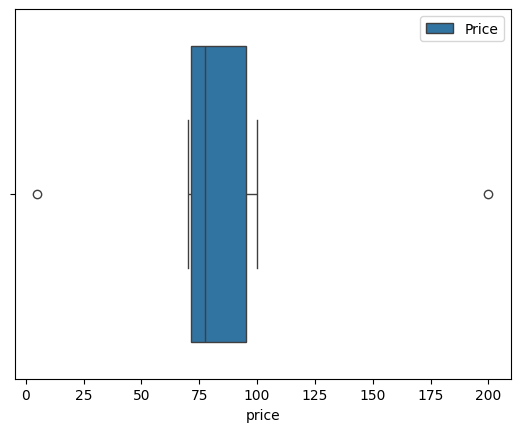

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats.mstats import winsorize
import matplotlib.pyplot as plt
import seaborn as sns


# Example dataset with outliers
data = pd.DataFrame({'price': [5, 70, 75, 80, 100, 200]})
print(data)
sns.boxplot(x=data['price'])
plt.legend(labels=['Price'])
plt.show()

In [ ]:
# Bottom 20%: The smallest 20% of values will be replaced by the 20th percentile.
# Top 20%: The largest 20% of values will be replaced by the 80th percentile.

data['Winsorized_Price'] = winsorize(data['price'], limits=[0.2, 0.2])
data

price  Winsorized_Price
0      5                70
1     70                70
2     75                75
3     80                80
4    100               100
5    200               100

In [ ]:
# function to detect and remove outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25) # 25th percentile
    Q3 = df[column].quantile(0.75) # 75th
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR # min
    upper_bound = Q3 + 1.5 * IQR # max

    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

    return df

In [ ]:
remove_outliers(data, 'price')

price  Winsorized_Price
1     70                70
2     75                75
3     80                80
4    100               100

## __9. Pandas Joining Techniques__

Pandas provides various joining techniques, such as merging, joining, and concatenating, which allow datasets to be combined using one or more keys. Each method has unique behaviors and applications.


- **Concatenate**: It appends DataFrames vertically or horizontally, offering a straightforward way to combine datasets with distinct columns or indices without regard for overlapping keys or index values.

- **Merge**: It combines DataFrames by aligning columns with shared keys, allowing for detailed control over overlapping column names and the use of multiple keys.

- **Join**: It aligns DataFrames based on their index values, making it ideal for coordinating data with corresponding indices.

These techniques are essential for integrating and analyzing different datasets. They enable a thorough understanding and help in making informed decisions in data-driven applications.

### __9.1 Pandas Concatenate__

- The __pd.concat()__ method combines DataFrames along rows or columns, preserving indices and columns.
- Specify axis=0 to concatenate along rows (vertical concatenation) or axis=1 to concatenate along columns (horizontal concatenation).

In [ ]:
df1 = pd.DataFrame(
   {
       "A": ["A0", "A1", "A2", "A3"],
       "B": ["B0", "B1", "B2", "B3"],
       "C": ["C0", "C1", "C2", "C3"],
       "D": ["D0", "D1", "D2", "D3"],
   },
   index=[0, 1, 2, 3],
)

df2 = pd.DataFrame(
   {
       "A": ["A4", "A5", "A6", "A7"],
       "B": ["B4", "B5", "B6", "B7"],
       "C": ["C4", "C5", "C6", "C7"],
       "D": ["D4", "D5", "D6", "D7"],
   },
   index=[4, 5, 6, 7],
)

df3 = pd.DataFrame(
   {
       "A": ["A8", "A9", "A10", "A11"],
       "B": ["B8", "B9", "B10", "B11"],
       "C": ["C8", "C9", "C10", "C11"],
       "D": ["D8", "D9", "D10", "D11"],
   },
   index=[8, 9, 10, 11],
)

frames = [df1, df2, df3]
Result = pd.concat(frames) # by default it concatenates along axis 0 (rows)
print(Result)

      A    B    C    D
0    A0   B0   C0   D0
1    A1   B1   C1   D1
2    A2   B2   C2   D2
3    A3   B3   C3   D3
4    A4   B4   C4   D4
5    A5   B5   C5   D5
6    A6   B6   C6   D6
7    A7   B7   C7   D7
8    A8   B8   C8   D8
9    A9   B9   C9   D9
10  A10  B10  C10  D10
11  A11  B11  C11  D11


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Concatenate.png)

Here's another example illustrating concatenation along both the vertical and horizontal axes.

In [ ]:
import pandas as pd

# Create two sample DataFrames
df1 = pd.DataFrame({'A': [1, 2, 3],
                    'B': [4, 5, 6]})

df2 = pd.DataFrame({'A': [7, 8, 9],
                    'B': [10, 11, 12]})

# Concatenate along rows (stack vertically)
Result_row = pd.concat([df1, df2], axis=0)

# Concatenate along columns (stack horizontally)
Result_column = pd.concat([df1, df2], axis=1)

print("\nDataframe 1:")
print(df1)
print("\nDataframe 2:")
print(df2)

print("\nConcatenated along rows:")
print(Result_row)

print("\nConcatenated along columns:")
print(Result_column)


Dataframe 1:
   A  B
0  1  4
1  2  5
2  3  6

Dataframe 2:
   A   B
0  7  10
1  8  11
2  9  12

Concatenated along rows:
   A   B
0  1   4
1  2   5
2  3   6
0  7  10
1  8  11
2  9  12

Concatenated along columns:
   A  B  A   B
0  1  4  7  10
1  2  5  8  11
2  3  6  9  12


In [ ]:
Result_column['A']

A  A
0  1  7
1  2  8
2  3  9

In [ ]:
Result_row.loc[0]

A   B
0  1   4
0  7  10

In [ ]:
Result_row.reset_index(drop=True)

A   B
0  1   4
1  2   5
2  3   6
3  7  10
4  8  11
5  9  12

### __9.2 Pandas Merge DataFrames__

- Utilize the  **pd.merge()** method to merge DataFrames based on specific keys or columns.
- Specify the join type in Pandas merge, which controls how rows from two DataFrames are combined.
- This ensures data alignment and prevents unintended outcomes.
- Choose the appropriate `how` parameter to specify the type of join.
- Specify the `on` parameter to indicate the column(s) to merge on.



**Types of Pandas Join**

There are various join logics available to merge Pandas DataFrames:

- Full Outer Join: It merges all rows from both DataFrames, using NaN to fill in missing values when no match is found.

- Inner Join: It combines matching rows from DataFrame 1 and DataFrame 2 based on a common key column.

- Right Join: It retains all rows from the right DataFrame, merges on common keys, and fills missing values with NaN.

- Left Join: It retains all rows from the left DataFrame, merging matching rows from the right and filling unmatched values with NaN.

- Cross: It creates the cartesian product of the rows of both frames.

In [ ]:
left = pd.DataFrame(
   {
      "key1": ["K0", "K0", "K1", "K2"],
      "key2": ["K0", "K1", "K0", "K1"],
      "A": ["A0", "A1", "A2", "A3"],
      "B": ["B0", "B1", "B2", "B3"],
   }
)
right = pd.DataFrame(
   {
      "key1": ["K0", "K1", "K1", "K2"],
      "key2": ["K0", "K0", "K0", "K0"],
      "C": ["C0", "C1", "C2", "C3"],
      "D": ["D0", "D1", "D2", "D3"],
   }
)
print("\nDataframe 1:")
print(left)
print("\nDataframe 2:")
print(right)


Dataframe 1:
  key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

Dataframe 2:
  key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3


**Full Outer Join**

In [ ]:
# Outer join merges all rows from both DataFrames, using NaN to fill in missing values when no match is found.
Result = pd.merge(left, right, how="outer", on=["key1", "key2"])
print(Result)

  key1 key2    A    B    C    D
0   K0   K0   A0   B0   C0   D0
1   K0   K1   A1   B1  NaN  NaN
2   K1   K0   A2   B2   C1   D1
3   K1   K0   A2   B2   C2   D2
4   K2   K0  NaN  NaN   C3   D3
5   K2   K1   A3   B3  NaN  NaN


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/outer_merge.png)


In [ ]:
left

key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

In [ ]:
right

key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3

**Inner Join**

In [ ]:
# Inner join combines matching rows from DataFrame 1 and DataFrame 2 based on a common key column.
Result = pd.merge(left, right, how="inner", on=["key1", "key2"])
print(Result)

  key1 key2   A   B   C   D
0   K0   K0  A0  B0  C0  D0
1   K1   K0  A2  B2  C1  D1
2   K1   K0  A2  B2  C2  D2


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_inner.png)

In [ ]:
left

key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

In [ ]:
right

key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3

**Right Join**

In [ ]:
# Right join retains all rows from the right DF, merges on common keys, and fills missing values with NaN.
Result = pd.merge(left, right, how="right", on=["key1", "key2"])
print(Result)

  key1 key2    A    B   C   D
0   K0   K0   A0   B0  C0  D0
1   K1   K0   A2   B2  C1  D1
2   K1   K0   A2   B2  C2  D2
3   K2   K0  NaN  NaN  C3  D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_right.png)

In [ ]:
left

key1 key2   A   B
0   K0   K0  A0  B0
1   K0   K1  A1  B1
2   K1   K0  A2  B2
3   K2   K1  A3  B3

In [ ]:
right

key1 key2   C   D
0   K0   K0  C0  D0
1   K1   K0  C1  D1
2   K1   K0  C2  D2
3   K2   K0  C3  D3

**Left Join**

In [ ]:
# Left join retains all rows from the left DataFrame, merging matching rows from the right and filling unmatched values with NaN.
Result = pd.merge(left, right, how="left", on=["key1", "key2"])
print(Result)

  key1 key2   A   B    C    D
0   K0   K0  A0  B0   C0   D0
1   K0   K1  A1  B1  NaN  NaN
2   K1   K0  A2  B2   C1   D1
3   K1   K0  A2  B2   C2   D2
4   K2   K1  A3  B3  NaN  NaN


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_letf.png)

In [ ]:
left

In [ ]:
right

**Cross**

In [ ]:
# Cross creates the cartesian product of the rows of both frames.
Result = pd.merge(left, right, how="cross")
print(Result)

   key1_x key2_x   A   B key1_y key2_y   C   D
0      K0     K0  A0  B0     K0     K0  C0  D0
1      K0     K0  A0  B0     K1     K0  C1  D1
2      K0     K0  A0  B0     K1     K0  C2  D2
3      K0     K0  A0  B0     K2     K0  C3  D3
4      K0     K1  A1  B1     K0     K0  C0  D0
5      K0     K1  A1  B1     K1     K0  C1  D1
6      K0     K1  A1  B1     K1     K0  C2  D2
7      K0     K1  A1  B1     K2     K0  C3  D3
8      K1     K0  A2  B2     K0     K0  C0  D0
9      K1     K0  A2  B2     K1     K0  C1  D1
10     K1     K0  A2  B2     K1     K0  C2  D2
11     K1     K0  A2  B2     K2     K0  C3  D3
12     K2     K1  A3  B3     K0     K0  C0  D0
13     K2     K1  A3  B3     K1     K0  C1  D1
14     K2     K1  A3  B3     K1     K0  C2  D2
15     K2     K1  A3  B3     K2     K0  C3  D3


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/merge_cross.png)

### __9.3 Pandas Join DataFrames__

- Use the __join()__ method to join DataFrames based on their indices
- Specify the `how` parameter to determine the type of join, similar to __pd.merge()__
- Use the `on` parameter if joining on specific columns, or simply call __join()__ without parameters to perform a simple index-based join




In [ ]:
left = pd.DataFrame(
    {
        "A": ["A0", "A1", "A2", "A3"],
        "B": ["B0", "B1", "B2", "B3"],
        "key": ["K0", "K1", "K0", "K1"],
    }
)
right = pd.DataFrame({"C": ["C0", "C1"],
                      "D": ["D0", "D1"]},
                      index=["K0", "K1"])
left

A   B key
0  A0  B0  K0
1  A1  B1  K1
2  A2  B2  K0
3  A3  B3  K1

In [ ]:
right

C   D
K0  C0  D0
K1  C1  D1

In [ ]:
Result = left.join(right, on="key")
print(Result)

    A   B key   C   D
0  A0  B0  K0  C0  D0
1  A1  B1  K1  C1  D1
2  A2  B2  K0  C0  D0
3  A3  B3  K1  C1  D1


The pictorial representation of the above output is as shown below:

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/join.png)

## __10. Aggregating Data__

Aggregating data involves summarizing or grouping data based on specific criteria. This is useful for creating meaningful insights and reducing data dimensionality.

- Common aggregation functions include average(mean), median, minimum(min), maximum(max), sum, standard deviation(std), variance(var), and count.

In [ ]:
import pandas as pd

# Creating a DataFrame with a 'Category' column and a 'Value' column
import pandas as pd

# Creating a DataFrame with a 'Category' column and a 'Value' column
data = {'Category': ['A', 'B', 'A', 'B', 'A'],
        'Value': [10, 15, 20, 25, 30]}
df = pd.DataFrame(data)

df

Category  Value
0        A     10
1        B     15
2        A     20
3        B     25
4        A     30

In [ ]:
# Grouping the DataFrame by 'Category' and calculating various aggregations
df_aggregated = df.groupby('Category').agg({
    'Value': ['mean', 'median', 'min', 'max', 'sum', 'std', 'var', 'count']
})

# Displaying the aggregated DataFrame
print("Aggregated DataFrame:")
df_aggregated

Aggregated DataFrame:


Value                                           
          mean median min max sum        std    var count
Category                                                 
A         20.0   20.0  10  30  60  10.000000  100.0     3
B         20.0   20.0  15  25  40   7.071068   50.0     2

In [ ]:
df_aggregated['Value']

mean  median  min  max  sum        std    var  count
Category                                                      
A         20.0    20.0   10   30   60  10.000000  100.0      3
B         20.0    20.0   15   25   40   7.071068   50.0      2

In [ ]:
df_aggregated.columns

MultiIndex([('Value',   'mean'),
            ('Value', 'median'),
            ('Value',    'min'),
            ('Value',    'max'),
            ('Value',    'sum'),
            ('Value',    'std'),
            ('Value',    'var'),
            ('Value',  'count')],
           )

In [ ]:
df_aggregated['Value', 'mean']

Category
A    20.0
B    20.0
Name: (Value, mean), dtype: float64

## __11. Reshaping Data__

Reshaping data includes pivoting, melting, or stacking data to achieve a structure suitable for specific analyses or visualizations.

![link text](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/ADSP_Images/Lesson_09_Data_Wrangling/Reshaping_data.png)

In [ ]:
import pandas as pd

# Assuming you have a DataFrame 'df' with 'Date', 'Category', and 'Value' columns
# Adjust column names and DataFrame based on your actual data

# DataFrame
df = pd.DataFrame({'Date': ['2022-01-01', '2022-01-01', '2022-01-02', '2022-01-02'],
                   'Category': ['A', 'B', 'A', 'B'],
                   'Value': [10, 15, 20, 25]})

df

Date Category  Value
0  2022-01-01        A     10
1  2022-01-01        B     15
2  2022-01-02        A     20
3  2022-01-02        B     25

In [ ]:
# Pivoting data for better analysis
df_pivoted = df.pivot_table(index='Date', columns='Category', values='Value', aggfunc='mean')

# Displaying the pivoted DataFrame
print("Pivoted DataFrame:")
df_pivoted

Pivoted DataFrame:


Category       A     B
Date                  
2022-01-01  10.0  15.0
2022-01-02  20.0  25.0

In [ ]:
df_pivoted.columns

Index(['A', 'B'], dtype='object', name='Category')

In [ ]:
import pandas as pd

# Creating a DataFrame where some values have extra spaces
data = {
    'State': [' WA', 'WA ', ' CA', 'NY '],
    'Population': [7.6, 7.8, 39.5, 19.3],
    'GDP': [500, 520, 3000, 1700]
}

df = pd.DataFrame(data)

print("Before Stripping:")
print(df)

Before Stripping:
  State  Population   GDP
0    WA         7.6   500
1   WA          7.8   520
2    CA        39.5  3000
3   NY         19.3  1700


In [ ]:
df['State'].value_counts()

State
 WA    1
WA     1
 CA    1
NY     1
Name: count, dtype: int64

In [ ]:
no_ws = df.replace(r' ', '', regex=True)
print(no_ws)

  State  Population   GDP
0    WA         7.6   500
1    WA         7.8   520
2    CA        39.5  3000
3    NY        19.3  1700


In [ ]:
no_ws['State'].value_counts()

State
WA    2
CA    1
NY    1
Name: count, dtype: int64

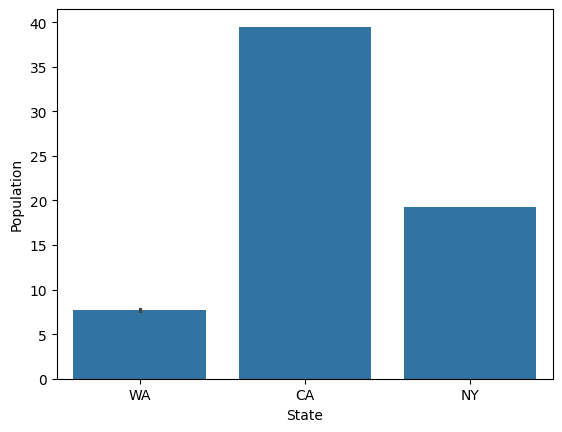

In [ ]:
sns.barplot(x=no_ws['State'], y=no_ws['Population'])

plt.show()

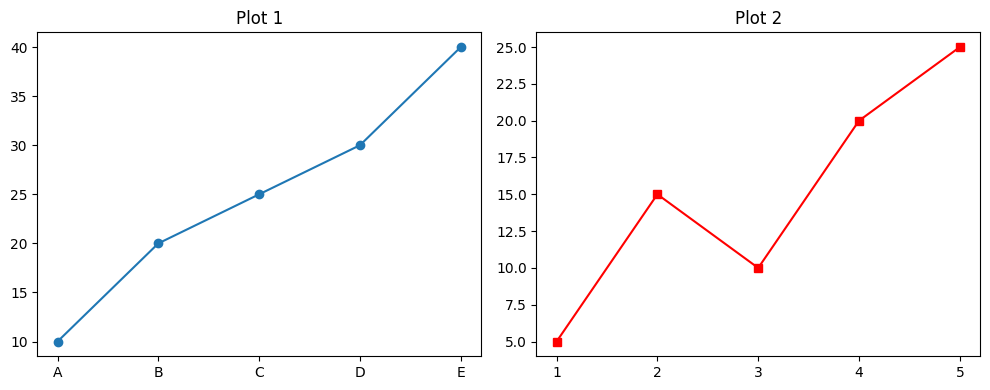

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(1, 6)
y1 = [10, 20, 25, 30, 40]
y2 = [5, 15, 10, 20, 25]

# Create subplots
fig, ax = plt.subplots(1, 2, figsize=(10, 4))

# First subplot
ax[0].plot(x, y1, marker='o')
ax[0].set_title("Plot 1")
ax[0].set_xticks([1, 2, 3, 4, 5])  # Custom xticks
ax[0].set_xticklabels(["A", "B", "C", "D", "E"])  # Custom labels

# Second subplot
ax[1].plot(x, y2, marker='s', color='r')
ax[1].set_title("Plot 2")
ax[1].set_xticks(np.arange(1, 6, 1))  # Set xticks at intervals of 1

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


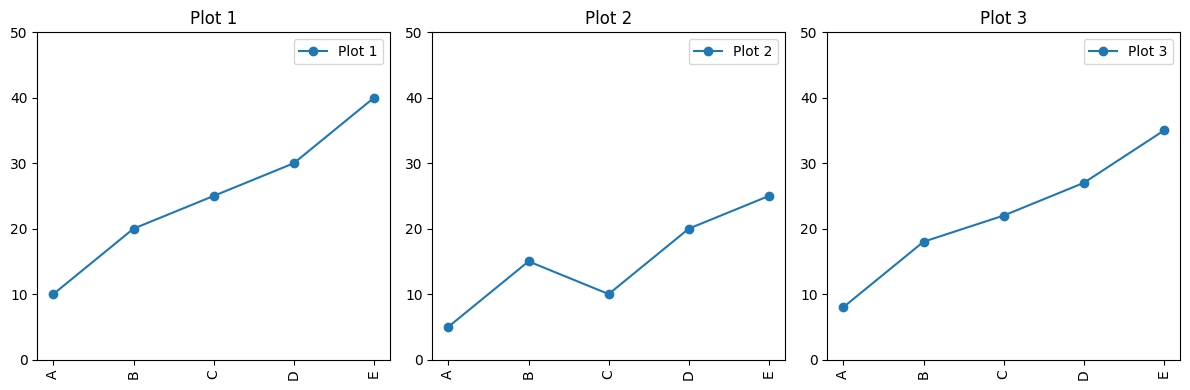

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sample data
x = np.arange(1, 6)
y_data = [
    [10, 20, 25, 30, 40],  # Data for subplot 1
    [5, 15, 10, 20, 25],   # Data for subplot 2
    [8, 18, 22, 27, 35]    # Data for subplot 3
]

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

# Custom tick labels
tick_labels = ["A", "B", "C", "D", "E"]

# Loop through subplots and set xticks
for i, ax in enumerate(axes):
    ax.plot(x, y_data[i], marker='o', label=f"Plot {i+1}")
    ax.set_title(f"Plot {i+1}")
    ax.set_xticks(x)  # Set xticks at positions [1,2,3,4,5]
    ax.set_xticklabels(tick_labels, rotation=90)  # Assign custom labels
    ax.set_ylim(0, 50)  # Set y-axis limits
    ax.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


# __Assisted Practice__

## __Problem Statement:__

The complexity of the housing market can be overwhelming. For a data scientist at a real estate company, the responsibility lies in analyzing housing data to uncover insights into house prices. The goal is to comprehend the elements influencing house prices and the impact of various house features on their price. This understanding aids the company in navigating the housing market more effectively and making well-informed decisions when purchasing and selling houses.

Use **housing_data.csv**

## __Steps to Perform:__

- Understand the structure of the dataset, the types of variables, and any obvious issues in the data
- Check for duplicate entries in the dataset and decide how to handle them
- Identify and handle missing values. Decide whether to fill them in or drop them based on the context
- Apply the necessary transformations to the variables. This could include scaling numerical variables or encoding categorical variables
- For continuous variables, consider creating bins to turn them into categorical variables. For example, you can bin the __YearBuilt__ feature into decades
- Identify outliers in the dataset and decide on a strategy to handle them. You can use a box plot to visualize outliers in features like __LotArea__ or __SalePrice__

In [ ]:
import pandas as pd

df = pd.read_csv('housing_data.csv')
df.head()

Unnamed: 0 MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0           0       SC60       RL         65.0     8450   Pave   NaN      Reg   
1           1       SC20       RL         80.0     9600   Pave   NaN      Reg   
2           2       SC60       RL         68.0    11250   Pave   NaN      IR1   
3           3       SC70       RL         60.0     9550   Pave   NaN      IR1   
4           4       SC60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0     No    No          No       0    Feb   
1         Lvl    AllPub  ...        0     No    No          No       0    May   
2         Lvl    AllPub  ...        0     No    No          No       0    Sep   
3         Lvl    AllPub  ...        0     No    No          No       0    Feb   
4         Lvl    AllPub  ...        0     No    No          No       0    Dec   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [ ]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Length: 1460, dtype: bool

In [ ]:
# Check for duplicates
print(df.duplicated().any())

# If there are duplicates, drop them
df.drop_duplicates(inplace=True)

False


**Check and handle missing values**

In [ ]:
missing_values = df.isna().sum() # isnul()
missing_values

Unnamed: 0       0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64

In [ ]:
type(missing_values)

pandas.core.series.Series

In [ ]:
missing_values[missing_values > 0]

Alley          1369
MasVnrType      872
Electrical        1
GarageYrBlt      81
dtype: int64

In [ ]:
df['Alley'].value_counts()

Alley
Grvl    50
Pave    41
Name: count, dtype: int64

In [ ]:
df['Alley'].unique()

array([nan, 'Grvl', 'Pave'], dtype=object)

In [ ]:
# fill numerical columns
# df.fillna(df.mean(), inplace=True)

In [ ]:
# fill numerical columns
df.fillna(df.mean(numeric_only=True), inplace=True)

# fill categorical columns
df.fillna(df.mode().iloc[0], inplace=True)

print(df['Alley'].unique())

['Grvl' 'Pave']


**Encode categorical variables**

In [ ]:
df.columns

Index(['Unnamed: 0', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea',
       'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'Pa

In [ ]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=['object']).columns
print(f" Categorical columns: {categorical_cols}")

label_encoder = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

 Categorical columns: Index(['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC',
       'Fence', 'MiscFeature', 'MoSold', 'SaleType', 'SaleCondition'],
      dtype='object')


In [ ]:
df.head()

Unnamed: 0  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  \
0           0           9         3         65.0     8450       1      0   
1           1           4         3         80.0     9600       1      0   
2           2           9         3         68.0    11250       1      0   
3           3          10         3         60.0     9550       1      0   
4           4           9         3         84.0    14260       1      0   

   LotShape  LandContour  Utilities  ...  PoolArea  PoolQC  Fence  \
0         3            3          0  ...         0       3      4   
1         3            3          0  ...         0       3      4   
2         0            3          0  ...         0       3      4   
3         0            3          0  ...         0       3      4   
4         0            3          0  ...         0       3      4   

   MiscFeature  MiscVal  MoSold  YrSold  SaleType  SaleCondition  SalePrice  
0            1        0       3    2008         8              4     208500  
1            1        0       8    2007         8              4     181500  
2            1        0      11    2008         8              4     223500  
3            1        0       3    2006         8              0     140000  
4            1        0       2    2008         8              4     250000  

[5 rows x 81 columns]

**Bin YearBuilt feature into decades**

In [ ]:
df['YearBuilt'].value_counts().sort_index()

YearBuilt
1872     1
1875     1
1880     4
1882     1
1885     2
        ..
2006    67
2007    49
2008    23
2009    18
2010     1
Name: count, Length: 112, dtype: int64

In [ ]:
# Manually define bins and labels

bins = [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010, 2020]

# Define the labels for each bin (the corresponding decades)
labels = ['1870-1880', '1880-1890', '1890-1990', '1900-1910', '1910-1920', '1920-1930', '1930-1940', '1940-1950', '1950-1960',
          '1960-1970', '1970-1980', '1980-1990', '1990-2000', '2000-2010', '2010-2020']

# Create a new column 'Decade' by binning the 'YearBuilt' column into decades
df['Decade'] = pd.cut(df['YearBuilt'], bins=bins, labels=labels, right=False)

df[['YearBuilt', 'Decade']]

YearBuilt     Decade
0          2003  2000-2010
1          1976  1970-1980
2          2001  2000-2010
3          1915  1910-1920
4          2000  2000-2010
...         ...        ...
1455       1999  1990-2000
1456       1978  1970-1980
1457       1941  1940-1950
1458       1950  1950-1960
1459       1965  1960-1970

[1460 rows x 2 columns]

In [ ]:
# Define bins and labels using for loop

bins = list(range(1870, 2020, 10))
print(f'Bins: {bins}')

labels = []

for i in bins[:-1]:
  label = f'({i}-{i+10}]'
  labels.append(label)

print(f'Labels: {labels}')

# # Create a new column 'Decade' by binning the 'YearBuilt' column into decades
df['Decade_New'] = pd.cut(df['YearBuilt'], bins=bins, labels=labels, right=True)

df[['YearBuilt', 'Decade_New']].sort_values(by='YearBuilt')

Bins: [1870, 1880, 1890, 1900, 1910, 1920, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000, 2010]
Labels: ['(1870-1880]', '(1880-1890]', '(1890-1900]', '(1900-1910]', '(1910-1920]', '(1920-1930]', '(1930-1940]', '(1940-1950]', '(1950-1960]', '(1960-1970]', '(1970-1980]', '(1980-1990]', '(1990-2000]', '(2000-2010]']


YearBuilt   Decade_New
1349       1872  (1870-1880]
1137       1875  (1870-1880]
1132       1880  (1870-1880]
304        1880  (1870-1880]
747        1880  (1870-1880]
...         ...          ...
103        2009  (2000-2010]
412        2009  (2000-2010]
898        2009  (2000-2010]
644        2009  (2000-2010]
378        2010  (2000-2010]

[1460 rows x 2 columns]

**Handle Outliers**

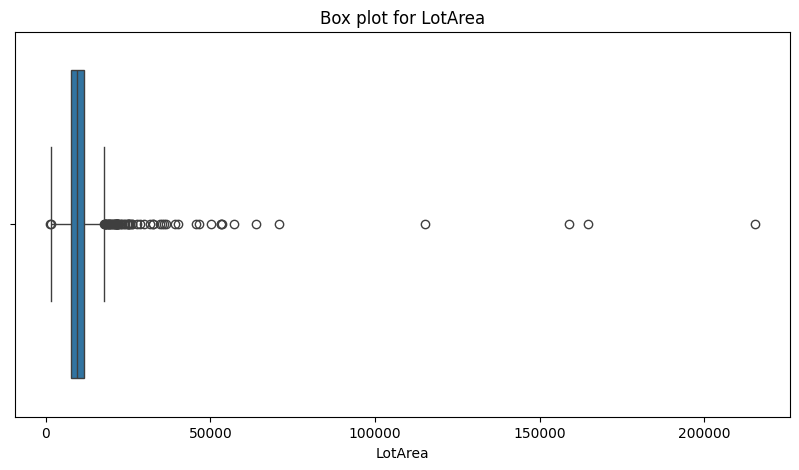

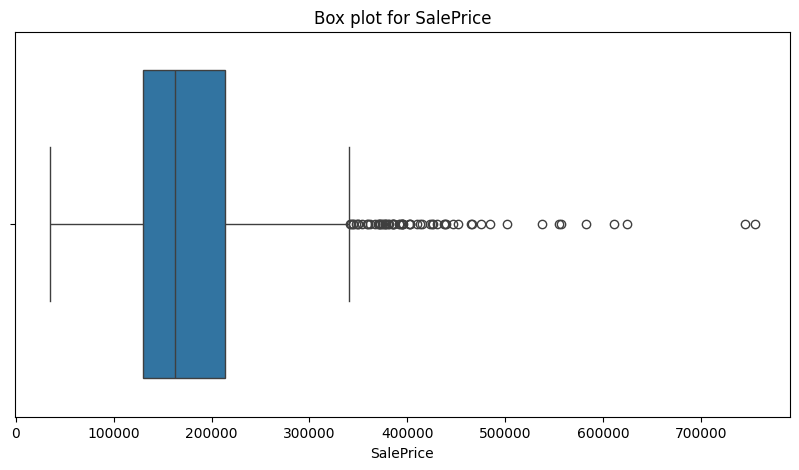

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a box plot for 'LotArea'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['LotArea'])
plt.title('Box plot for LotArea')
plt.show()

# Create a box plot for 'SalePrice'
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['SalePrice'])
plt.title('Box plot for SalePrice')
plt.show()

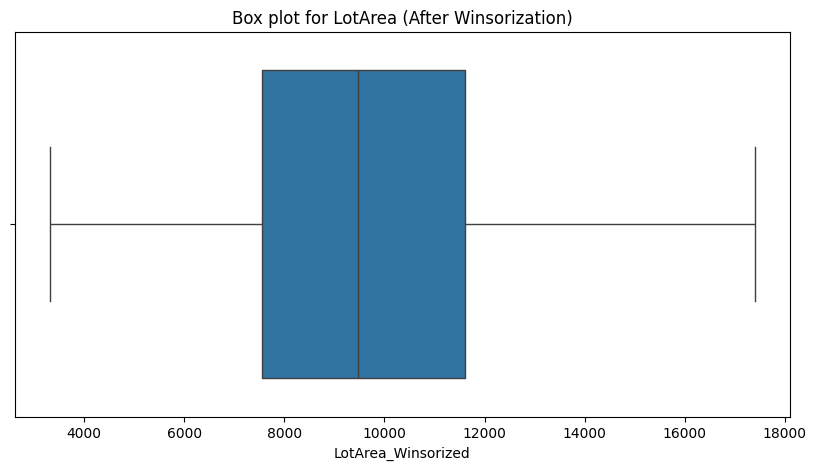

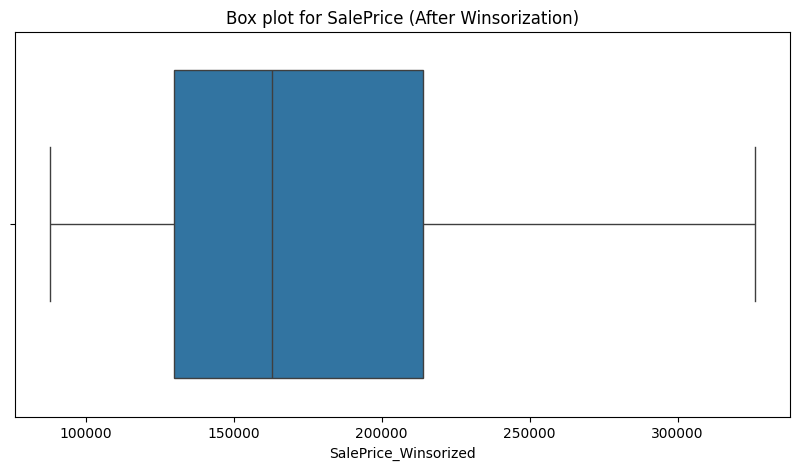

      LotArea  LotArea_Winsorized  SalePrice  SalePrice_Winsorized
0        8450                8450     208500                208500
1        9600                9600     181500                181500
2       11250               11250     223500                223500
3        9550                9550     140000                140000
4       14260               14260     250000                250000
...       ...                 ...        ...                   ...
1455     7917                7917     175000                175000
1456    13175               13175     210000                210000
1457     9042                9042     266500                266500
1458     9717                9717     142125                142125
1459     9937                9937     147500                147500

[1460 rows x 4 columns]


In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize the 'LotArea' and 'SalePrice' columns (5th and 95th percentiles)
df['LotArea_Winsorized'] = winsorize(df['LotArea'], limits=[0.05, 0.05])  # 5% lower and upper
df['SalePrice_Winsorized'] = winsorize(df['SalePrice'], limits=[0.05, 0.05])  # 5% lower and upper

# Visualize the box plots after Winsorization
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['LotArea_Winsorized'])
plt.title('Box plot for LotArea (After Winsorization)')
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df['SalePrice_Winsorized'])
plt.title('Box plot for SalePrice (After Winsorization)')
plt.show()

# Check the updated DataFrame
print(df[['LotArea', 'LotArea_Winsorized', 'SalePrice', 'SalePrice_Winsorized']])